In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raisin=pd.read_excel("E:/Data science/python/New folder/Raisin_Dataset.xlsx")

In [3]:
raisin

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [4]:
raisin.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

<AxesSubplot:xlabel='MajorAxisLength', ylabel='MinorAxisLength'>

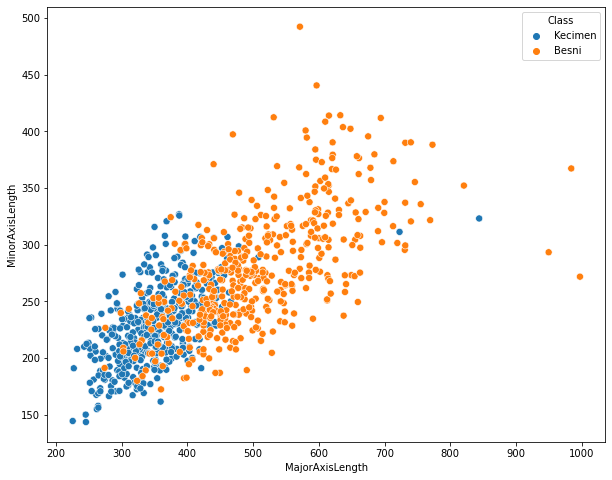

In [8]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=raisin,x="MajorAxisLength",y="MinorAxisLength",hue="Class",s=50)

<AxesSubplot:>

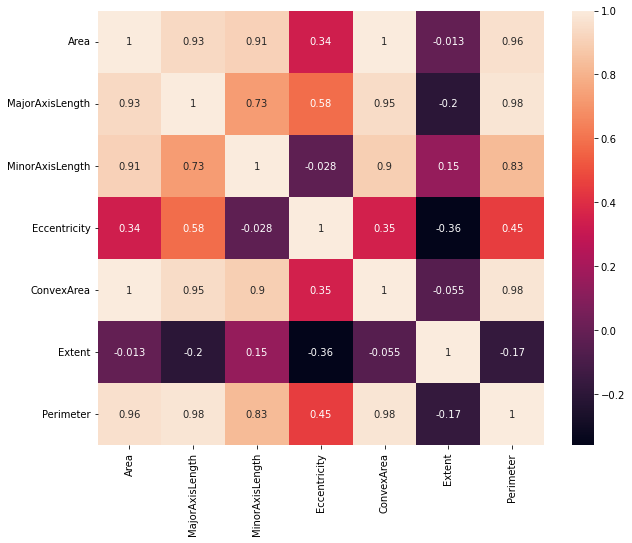

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(raisin.corr(),annot=True)

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
raisin['Class']= label_encoder.fit_transform(raisin['Class'])

In [17]:
raisin

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=raisin.drop(["Class"],axis=1)

In [14]:
y=raisin['Class']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

# Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="gini", min_samples_split=10,min_samples_leaf=10,random_state=50)

In [18]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10,
                       random_state=50)

In [19]:
y_pred=classifier.predict(x_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [21]:
print("confusion_matrix")
print('------')
print(confusion_matrix(y_test,y_pred))

confusion_matrix
------
[[62 11]
 [10 52]]


In [22]:
print("classification_report")
print('------')
print(classification_report(y_test,y_pred))

classification_report
------
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        73
           1       0.83      0.84      0.83        62

    accuracy                           0.84       135
   macro avg       0.84      0.84      0.84       135
weighted avg       0.84      0.84      0.84       135



In [23]:
print("accuracy score")
print('------')
print(accuracy_score(y_test,y_pred))

accuracy score
------
0.8444444444444444


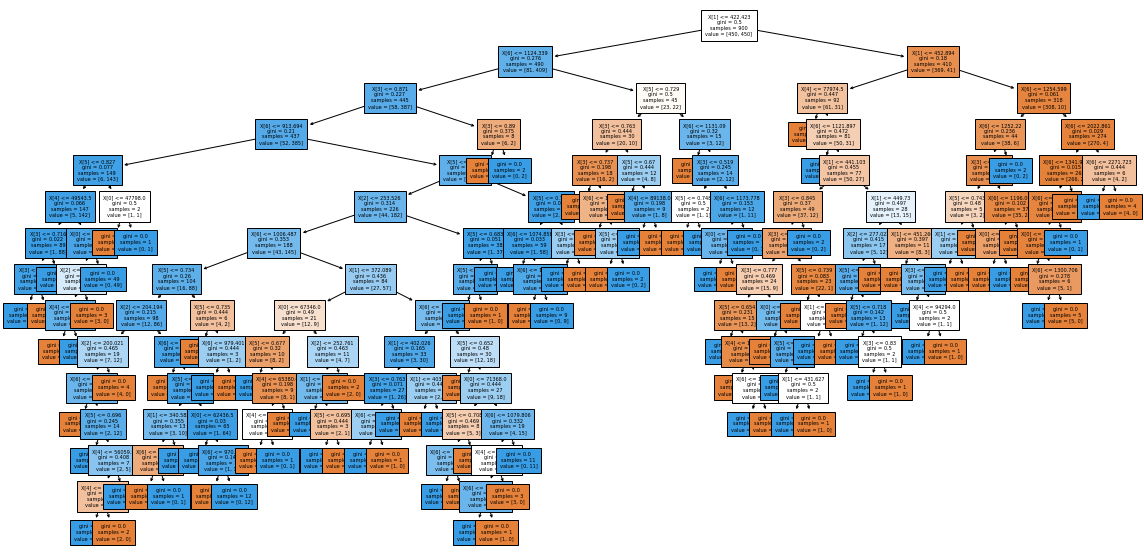

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
clf=DecisionTreeClassifier().fit(x,y)
plot_tree(clf,filled=True,fontsize=5)
plt.show()

# RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier( n_estimators=5,random_state=0)

In [27]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [28]:
y_rf_pred = rfc.predict(x_test)

In [29]:
print("confusion_matrix")
print('------')
print(confusion_matrix(y_test,y_rf_pred))

confusion_matrix
------
[[60 13]
 [ 6 56]]


In [32]:
print("classification_report")
print('------')
print(classification_report(y_test,y_rf_pred))

classification_report
------
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        73
           1       0.81      0.90      0.85        62

    accuracy                           0.86       135
   macro avg       0.86      0.86      0.86       135
weighted avg       0.86      0.86      0.86       135



In [33]:
print("accuracy score")
print('------')
print(accuracy_score(y_test,y_rf_pred)*100)

accuracy score
------
85.92592592592592


# Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
model=GaussianNB()

In [38]:
model.fit(x_train,y_train)

GaussianNB()

In [39]:
y_nb_predict=model.predict(x_test)

In [42]:
print("Naive Bayes score: ",model.score(x_test, y_test)*100)

Naive Bayes score:  81.48148148148148


# K Nearest Neighbour

In [43]:
df0=raisin[raisin['Class']==1]

In [44]:
df1=raisin[raisin['Class']==0]

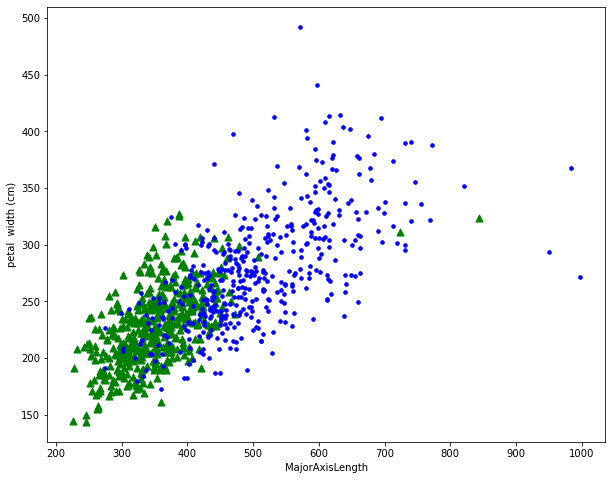

In [56]:
plt.figure(figsize=(10,8))
plt.xlabel('MajorAxisLength')
plt.ylabel('petal  width (cm)')
plt.scatter(df0['MajorAxisLength'],df0['MinorAxisLength'],color='green',marker='^',s=50)
plt.scatter(df1['MajorAxisLength'],df1['MinorAxisLength'],color='blue',marker='.',s=50)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [58]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [59]:
knn.score(x_test,y_test)

0.8148148148148148

In [60]:
from sklearn.metrics import confusion_matrix
y_knn_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_knn_pred)
cm

array([[66,  7],
       [18, 44]], dtype=int64)

Text(33.0, 0.5, 'Truth')

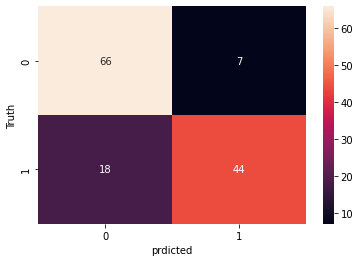

In [61]:
import seaborn as sns
plt.figure()
sns.heatmap(cm,annot=True)
plt.xlabel('prdicted')
plt.ylabel('Truth')

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        73
           1       0.83      0.84      0.83        62

    accuracy                           0.84       135
   macro avg       0.84      0.84      0.84       135
weighted avg       0.84      0.84      0.84       135

